In [209]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [241]:
sns.set()
sns.set_style("white", rc={
    'axes.grid': False,
    'axes.labelcolor': '0.4',
    'axes.edgecolor': '0.8',
    'axes.facecolor': '1.0',
    'text.color': '0.4',
    'xtick.color': '0.4',
    'ytick.color': '0.4',
    'axes.linewidth': 2,
})
palette = sns.color_palette("Spectral_r", 350)
sns.set_palette(palette)
sns.set_context("notebook", font_scale=1.2)

In [344]:
data = pd.read_csv("Assets/.logs/elite_fitness.csv", header=None, names=["generation", "fitness", "duration"])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x116cf4d10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x116adbed0>], dtype=object)

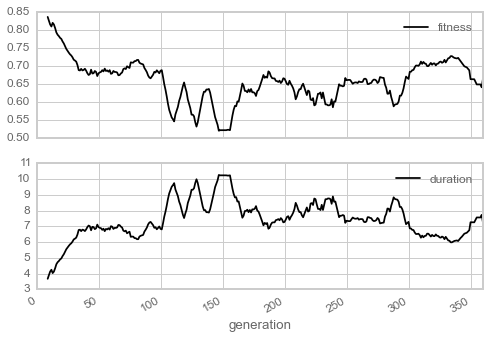

In [347]:
df = pd.DataFrame(data[["fitness", "duration"]], index=data["generation"])
pd.rolling_mean(df, 10).plot(subplots=True)

In [322]:
data = pd.read_csv("Assets/.logs/species.csv", header=None, names=["generation", "species", "size", "fitness"])

In [339]:
df = data.groupby(["generation", "species"])["size"].first().unstack("species").fillna(0)

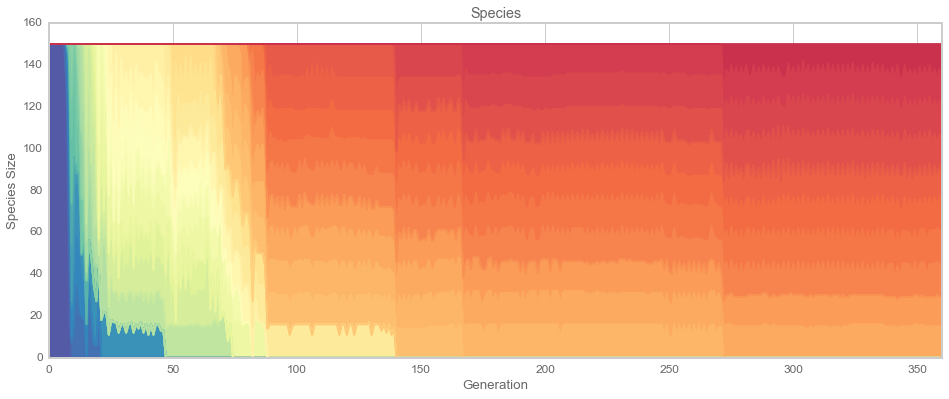

In [343]:
ax = df.plot(kind="area", stacked=True, legend=False, title="Species", figsize=(16, 6), color=sns.color_palette("Spectral_r", 50))
ax.set_xlabel("Generation")
ax.set_ylabel("Species Size")

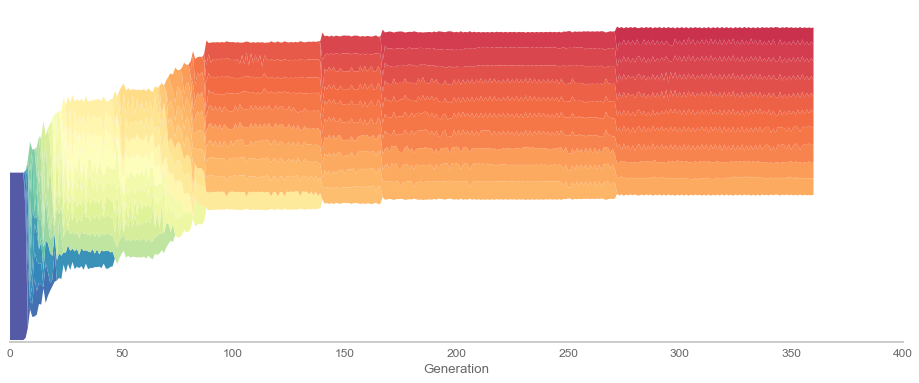

In [341]:
from matplotlib import transforms

X = df.index.values
Y = [df[c] for c in df.columns.values]

fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(111)

plt.stackplot(X, *Y, colors=sns.color_palette("Spectral_r", 50), baseline="wiggle", linewidths=0)

ax.set_xlabel("Generation")
ax.set_ylabel("Species Size")
ax.get_yaxis().set_visible(False)

sns.despine(left=True, trim=True)